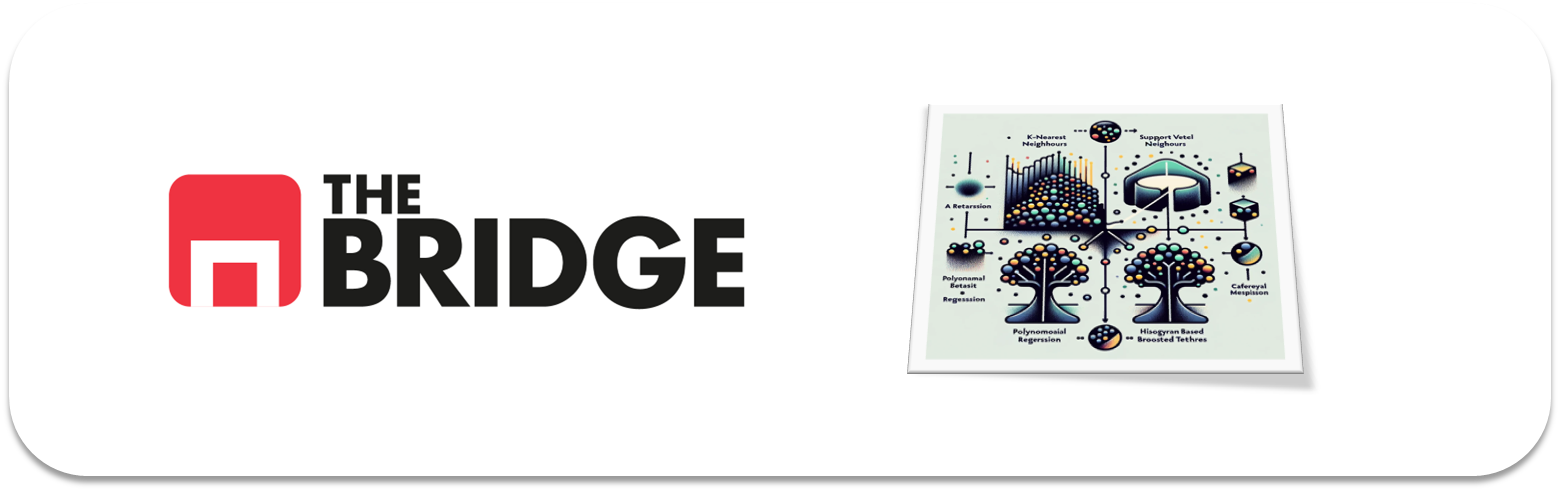

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de regresionicación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

import bootcampviztools as bt

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para regresionicación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep="|")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


> Variables target para regresionicación: 'class' y 'quality'

class
white    0.753886
red      0.246114
Name: proportion, dtype: float64


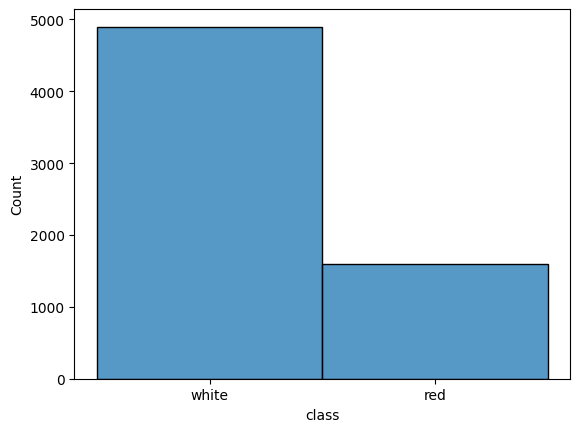

In [6]:
# Target categorica 1: Distribución 'class'
target_cat_1 = "class"
print(df[target_cat_1].value_counts(normalize=True))

sns.histplot(df[target_cat_1], discrete=True)
plt.show()

In [7]:
# Transformamos a numéricos los valores de 'class'
df.loc[df[target_cat_1] == "red", target_cat_1] = 1
df.loc[df[target_cat_1] == "white", target_cat_1] = 2

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,2
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,2
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,2
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,2
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,2
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,1
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,2
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,1


quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64


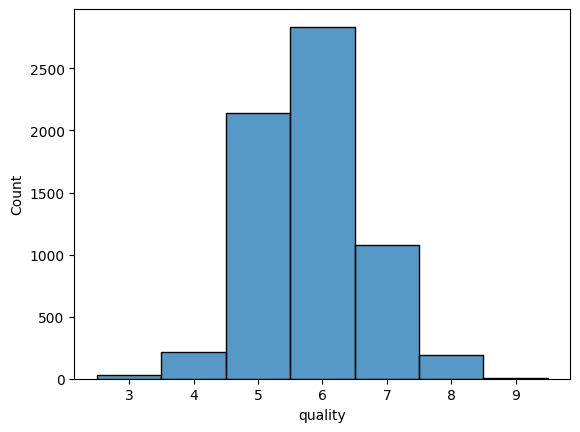

In [9]:
# Target categorica 2: Distribución 'quality'
target_cat_2 = "quality"
print(df[target_cat_2].value_counts(normalize=True))

sns.histplot(df[target_cat_2], discrete=True)
plt.show()

In [10]:
df[target_cat_2] = df[target_cat_2] - 3

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,3,2
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,3,2
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,4,2
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,0,2
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,2,2
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,2,1
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,2,2
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,2,1


> Variable target para regresión: 'alcohol'

alcohol
9.500000     0.056488
9.400000     0.051101
9.200000     0.041712
10.000000    0.035247
10.500000    0.034939
               ...   
11.550000    0.000154
12.333333    0.000154
10.566667    0.000154
10.750000    0.000154
11.433333    0.000154
Name: proportion, Length: 111, dtype: float64


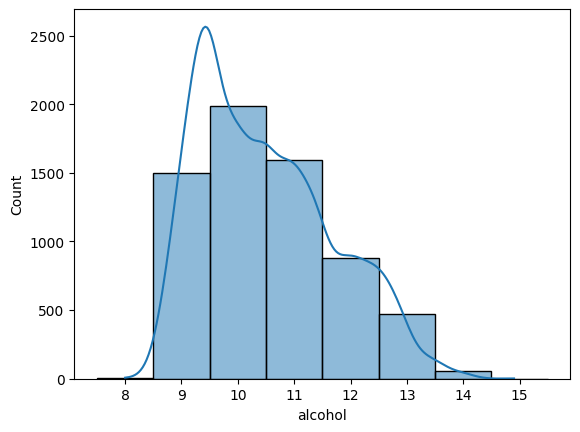

In [12]:
# Target numerrica: Distribución 'alcohol'
target_num = "alcohol"
print(df[target_num].value_counts(normalize=True))

sns.histplot(df[target_num], discrete=True, kde=True)
plt.show()

In [13]:
features_cat = ["class","quality"]
features_num = df.columns.tolist()

features_all = features_cat + features_num

for col in features_cat:
    features_num.remove(col)

In [14]:
print(f"Features Cat.: {features_cat}")
print(f"Features Num.: {features_num}")    

Features Cat.: ['class', 'quality']
Features Num.: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [15]:
# Dividimos el dataset en Train y test para ambos modelos (categorico y regresión)

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

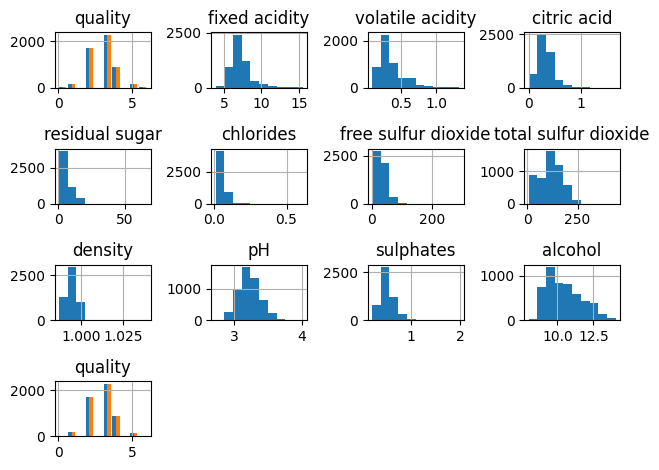

In [16]:
train_set[features_all].hist()
plt.tight_layout()

(15, 2)


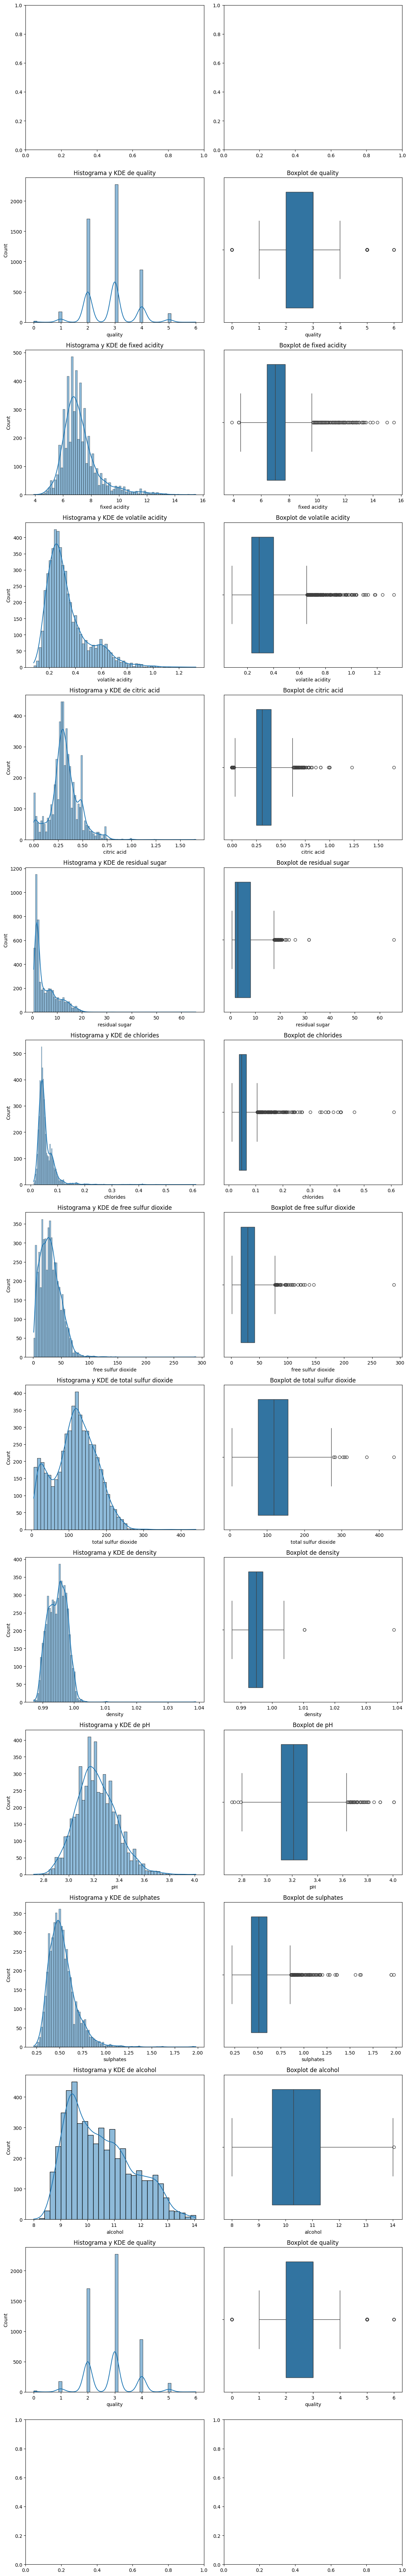

In [17]:
bt.plot_combined_graphs(train_set, features_all)

### #2 Modelado para clasificación

Crea un modelo que permita regresionicar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [18]:
target_clasif = "quality"

features_cat_clasif = features_cat.copy()
features_cat_clasif.remove(target_clasif)

features_num_clasif = features_num.copy()

features_clasif = features_cat_clasif + features_num;

print(f"Clasificación target: {target_clasif}")
print(f"Clasificación all features: {features_clasif}")    
print(f"Clasificación features Cat.: {features_cat_clasif}")
print(f"Clasificación features Num.: {features_num_clasif}")    

Clasificación target: quality
Clasificación all features: ['class', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Clasificación features Cat.: ['class']
Clasificación features Num.: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [19]:
# Set de entrenamiento
X_train_clasif = train_set[features_clasif].copy()
y_train_clasif = train_set[target_clasif].copy()

#Set de test
X_test_clasif = test_set[features_clasif].copy()
y_test_clasif = test_set[target_clasif].copy()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_clasif = pd.DataFrame(scaler.fit_transform(X_train_clasif[features_num_clasif]), columns= features_num_clasif)
X_test_scaled_clasif = pd.DataFrame(scaler.transform(X_test_clasif[features_num_clasif]), columns = features_num_clasif)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

knn_clf = KNeighborsClassifier(n_neighbors=7)
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state= 42)
rf_clf = RandomForestClassifier(max_depth = 5, random_state= 42)
xgb_clf = XGBClassifier(max_depth = 5, enable_categorical = True, random_state = 42)
lgb_clf = LGBMClassifier(max_depth = 5, random_state= 42, verbose = -100)

model_scaled_clasif = ["KNN","Logistic Regression"]
model_names_clasif = model_scaled_clasif + ["DecisionTree","Random Forest","XGBoost","LightGBM"]
model_set_clasif = [knn_clf, lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf]


In [22]:
from sklearn.metrics import classification_report

metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names_clasif, model_set_clasif):
    print(nombre, ":", modelo)
    if nombre in model_scaled_clasif:# las regresiones logisticas y knn necesitan los datos escalados
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled_clasif, y_train_clasif, cv = 3, scoring = "accuracy")
    else: 
        metricas_cv[nombre] = cross_val_score(modelo, X_train_clasif, y_train_clasif, cv = 3, scoring = "accuracy")
    print("\t",nombre,"-> Metricas",metricas_cv[nombre])
    valores.append(np.mean(metricas_cv[nombre]))


KNN : KNeighborsClassifier(n_neighbors=7)
	 KNN -> Metricas [0.54645124 0.53926097 0.52424942]
Logistic Regression : LogisticRegression(max_iter=10000)
	 Logistic Regression -> Metricas [0.54702827 0.53983834 0.54214781]
DecisionTree : DecisionTreeClassifier(max_depth=5, random_state=42)
	 DecisionTree -> Metricas [0.52625505 0.53290993 0.52598152]
Random Forest : RandomForestClassifier(max_depth=5, random_state=42)
	 Random Forest -> Metricas [0.54875938 0.55138568 0.55484988]
XGBoost : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1003, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
           ^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 1402, in next
    input_data(**self.kwargs)
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 1447, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:class: object


In [ ]:
ganador = list(metricas_cv.keys())[np.argmax(valores)]
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [28]:
target_regresion = "alcohol"

features_cat_regresion = features_cat.copy()

features_num_regresion = features_num.copy()
features_num_regresion.remove(target_regresion)

features_regresion = features_cat_clasif + features_num;

print(f"Regresión target: {target_regresion}")
print(f"Regresión all features: {features_regresion}")    
print(f"Regresión features Cat.: {features_cat_regresion}")
print(f"Regresión features Num.: {features_num_regresion}")    

Regresión target: alcohol
Regresión all features: ['class', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Regresión features Cat.: ['class', 'quality']
Regresión features Num.: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']


In [29]:
# Set de entrenamiento
X_train_regresion = train_set[features_regresion].copy()
y_train_regresion = train_set[target_regresion].copy()

#Set de test
X_test_regresion = test_set[features_regresion].copy()
y_test_regresion = test_set[target_regresion].copy()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_regresion = pd.DataFrame(scaler.fit_transform(X_train_regresion[features_num_regresion]), columns= features_num_regresion)
X_test_scaled_regresion = pd.DataFrame(scaler.transform(X_test_regresion[features_num_regresion]), columns = features_num_regresion)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


knn_rg = KNeighborsRegressor(n_neighbors=5)
lr_rg = LinearRegression()
rf_rg = RandomForestRegressor(max_depth=5, random_state=42)
tree_clf = DecisionTreeRegressor(max_depth = 5, random_state= 42)
xgb_rg = XGBRegressor(max_depth=5, random_state=42)
lgb_rg = LGBMRegressor(max_depth=5, random_state=42, verbose=-100, n_jobs=-1)

model_scaled_regresion = ["KNN","Linear Regression"]
model_names_regresion = model_scaled_regresion + ["DecisionTree","Random Forest","XGBoost","LightGBM"]
model_set_regresion = [knn_rg, lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf]


In [32]:
from sklearn.metrics import classification_report

metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names_regresion, model_set_regresion):
    print(nombre, ":", modelo)
    if nombre in model_scaled_regresion:# las regresiones y knn necesitan los datos escalados
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled_regresion, y_train_regresion, cv = 3, scoring = "accuracy")
    else: 
        metricas_cv[nombre] = cross_val_score(modelo, X_train_regresion, y_train_regresion, cv = 3, scoring = "accuracy")
    print("\t",nombre,"-> Metricas",metricas_cv[nombre])
    valores.append(np.mean(metricas_cv[nombre]))

KNN : KNeighborsRegressor()


c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Pyth

	 KNN -> Metricas [nan nan nan]
Linear Regression : LogisticRegression(max_iter=10000)


c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Pyth

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1231, in fit
    check_classification_targets(y)
  File "c:\Users\justo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
